In [185]:
import os

In [186]:
path = 'dataset/'

In [187]:

image_path = []
for files in os.listdir(path):
    label = files
    path1 = os.path.join(path,files)
    if os.path.isdir(path1):
        for image in os.listdir(path1):
            if '.jpg' in image:
                image_path.append((os.path.join(path1,image),label))
print(image_path)

[('dataset/0\\1-0.jpg', '0'), ('dataset/0\\1-1.jpg', '0'), ('dataset/0\\1-11.jpg', '0'), ('dataset/0\\1-12.jpg', '0'), ('dataset/0\\1-13.jpg', '0'), ('dataset/0\\1-16.jpg', '0'), ('dataset/0\\1-17.jpg', '0'), ('dataset/0\\1-18.jpg', '0'), ('dataset/0\\1-19.jpg', '0'), ('dataset/0\\1-2.jpg', '0'), ('dataset/0\\1-22.jpg', '0'), ('dataset/0\\1-24.jpg', '0'), ('dataset/0\\1-26.jpg', '0'), ('dataset/0\\1-27.jpg', '0'), ('dataset/0\\1-29.jpg', '0'), ('dataset/0\\1-31.jpg', '0'), ('dataset/0\\1-32.jpg', '0'), ('dataset/0\\1-33.jpg', '0'), ('dataset/0\\1-36.jpg', '0'), ('dataset/0\\1-37.jpg', '0'), ('dataset/0\\1-38.jpg', '0'), ('dataset/0\\1-4.jpg', '0'), ('dataset/0\\1-40.jpg', '0'), ('dataset/0\\1-41.jpg', '0'), ('dataset/0\\1-42.jpg', '0'), ('dataset/0\\1-44.jpg', '0'), ('dataset/0\\1-45.jpg', '0'), ('dataset/0\\1-46.jpg', '0'), ('dataset/0\\1-48.jpg', '0'), ('dataset/0\\1-5.jpg', '0'), ('dataset/0\\1-50.jpg', '0'), ('dataset/0\\1-51.jpg', '0'), ('dataset/0\\1-52.jpg', '0'), ('dataset/0\\1

In [188]:
import random

random.shuffle(image_path)

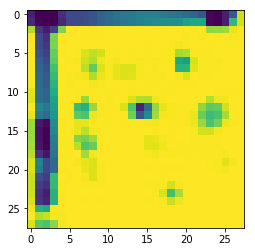

In [208]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
X= []
Y= []
for img in image_path:
    img_resized = cv2.imread(img[0])
    gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)
    img_resized = cv2.resize(gray, (28,28))
    plt.imshow(img_resized)
    image = np.reshape(img_resized, (28, 28, 1))/255.0
    X.append(image) 
    Y.append(int(img[1]))

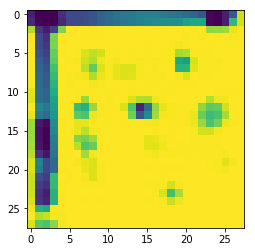

In [209]:
X = np.asarray(X)
Y = np.asarray(Y)
plt.imshow(cv2.resize(img_resized, (28,28)))

In [210]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.75, random_state=76)

In [211]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2388, 28, 28, 1)
(796, 28, 28, 1)
(2388,)
(796,)


In [212]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D
from keras import backend as K
from keras.layers.normalization import BatchNormalization

batch_size = 128
num_classes = 10
epochs = 15

In [213]:
# convert class vectors to binary class matrices
temp_y = y_test
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [214]:
model = Sequential()

model.add(Conv2D(32,(3,3),input_shape=(28,28,1)))
model.add(Activation('relu'))
BatchNormalization(axis=-1)
model.add(MaxPooling2D(pool_size=(2,2)))
BatchNormalization(axis=-1)
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
BatchNormalization(axis=-1)
model.add(MaxPooling2D(pool_size=(2,2)))
BatchNormalization(axis=-1)
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
BatchNormalization(axis=-1)
model.add(Flatten())
BatchNormalization()
# model.add(Dense(9216))
# model.add(Activation('relu'))
# BatchNormalization()
model.add(Dense(576))
model.add(Activation('relu'))
BatchNormalization()
model.add(Dropout(0.2))
model.add(Dense(10))

model.add(Activation('softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])


In [215]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_46 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
activation_89 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
activation_90 (Activation)   (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 3, 3, 64)          36928     
__________

In [216]:
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_data=(X_test, y_test))

Train on 2388 samples, validate on 796 samples
Epoch 1/15
 - 20s - loss: 2.1299 - acc: 0.2881 - val_loss: 1.5913 - val_acc: 0.4070
Epoch 2/15
 - 4s - loss: 1.2450 - acc: 0.5712 - val_loss: 0.8508 - val_acc: 0.7035
Epoch 3/15
 - 5s - loss: 0.7049 - acc: 0.7869 - val_loss: 0.5151 - val_acc: 0.8530
Epoch 4/15
 - 4s - loss: 0.4215 - acc: 0.8840 - val_loss: 0.3085 - val_acc: 0.9095
Epoch 5/15
 - 5s - loss: 0.2682 - acc: 0.9242 - val_loss: 0.2307 - val_acc: 0.9397
Epoch 6/15
 - 5s - loss: 0.1948 - acc: 0.9477 - val_loss: 0.1727 - val_acc: 0.9598
Epoch 7/15
 - 4s - loss: 0.1372 - acc: 0.9652 - val_loss: 0.1255 - val_acc: 0.9673
Epoch 8/15
 - 4s - loss: 0.0972 - acc: 0.9770 - val_loss: 0.0997 - val_acc: 0.9711
Epoch 9/15
 - 4s - loss: 0.0858 - acc: 0.9761 - val_loss: 0.1011 - val_acc: 0.9724
Epoch 10/15
 - 5s - loss: 0.0744 - acc: 0.9812 - val_loss: 0.0797 - val_acc: 0.9786
Epoch 11/15
 - 4s - loss: 0.0456 - acc: 0.9904 - val_loss: 0.0682 - val_acc: 0.9837
Epoch 12/15
 - 4s - loss: 0.0329 - ac

In [217]:
model.save('cnn_model4.h5')

In [218]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(test_acc)

796/796 [==============================] - 0s 583us/step
0.9886934673366834


In [219]:
predictions = [np.argmax(i) for i in model.predict(X_test)]

In [220]:
from sklearn import metrics

class_wise = metrics.classification_report(y_true=temp_y, y_pred=predictions)
print(class_wise)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        95
           1       1.00      0.99      0.99        79
           2       0.96      1.00      0.98        75
           3       0.99      1.00      0.99        76
           4       1.00      0.99      0.99        78
           5       0.97      0.99      0.98        78
           6       0.99      0.98      0.98        81
           7       1.00      0.97      0.99        68
           8       1.00      0.98      0.99        99
           9       0.97      1.00      0.99        67

    accuracy                           0.99       796
   macro avg       0.99      0.99      0.99       796
weighted avg       0.99      0.99      0.99       796

